### Student Information
Name: 陳柏維

Student ID: 109062503

GitHub ID:  powei-C

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### ** >>> Lab1 Take Home Exercises:** 

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 

In [7]:
X.query('category == 0').iloc[::2][0:5]

text  category category_name
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   alt.atheism
17  Organization: Penn State University From: <JSN...         0   alt.atheism
21  From: gmiller@worldbank.org (Gene C. Miller) S...         0   alt.atheism
37  From: bcash@crchh410.NoSubdomain.NoDomain (Bri...         0   alt.atheism
41  From: sandvik@newton.apple.com (Kent Sandvik) ...         0   alt.atheism

### >>> **Exercise 5 (take home)** 

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# Answer here
for i in NA_df['missing_example']:
    print(type(i))
    
#since missing data is saved as 'string' type,it can't be found as a missing value when using isnull().

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


In [11]:
X_sample = X.sample(n=1000) #random state

In [12]:
X_sample[0:4]

text  category  \
931   From: news@cbnewsk.att.com Subject: Re: When a...         3   
1451  From: jchen@wind.bellcore.com (Jason Chen) Sub...         2   
1223  From: bbs.mirage@tsoft.net (Jerry Lee) Subject...         1   
22    From: jkellett@netcom.com (Joe Kellett) Subjec...         3   

               category_name  
931   soc.religion.christian  
1451                 sci.med  
1223           comp.graphics  
22    soc.religion.christian

### >>> Exercise 6 (take home):

In [13]:
# Answer here
X_sample.sort_index(axis = 0)[:4]
#the index of X_sample is not in order.

text  category  \
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   

             category_name  
4   soc.religion.christian  
8                  sci.med  
9                  sci.med  
11           comp.graphics

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 

Text(0, 0.5, 'Count')

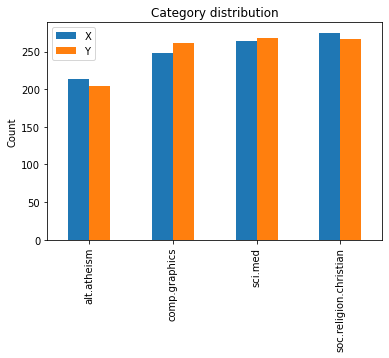

In [15]:
# Answer here
Y_sample = X.sample(n=1000)
#print(X_sample.category_name.value_counts())
#print(Y_sample.category_name.value_counts())
XYplot = pd.DataFrame({
    "X":X_sample.category_name.value_counts(),
    "Y":Y_sample.category_name.value_counts(),
    }
)

XYplot.plot(kind="bar")
plt.title("Category distribution")
plt.ylabel("Count")

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**

In [17]:
# Answer here
print( count_vect.get_feature_names()[ np.where(X_counts[4, 0:100].toarray()[0] == 1)[0][1] ])



01


In [18]:
import seaborn as sns

### **>>> Exercise 11 (take home):** 

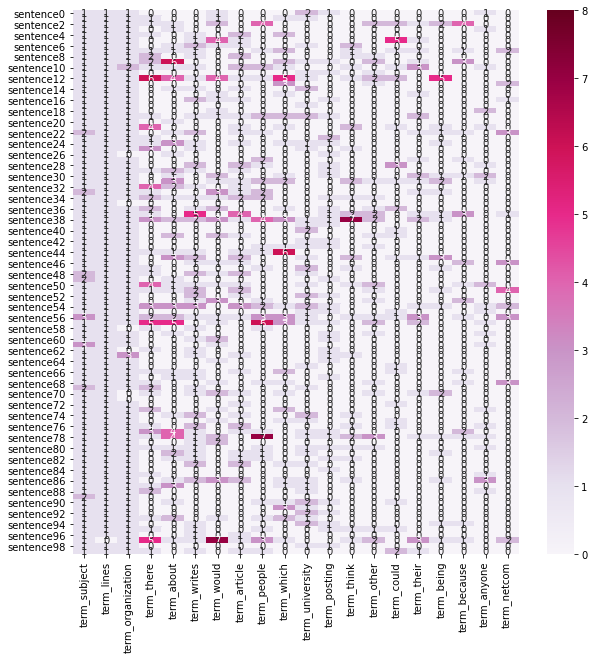

In [19]:
# Answer here
# Sample some docs with some terms 

sample_Y=100 #sample量
sample_X=20 #samle量中最常出現的前sample_X個terms

plot_Y = ["doc_"+ str(i) for i in list(X.index)[0:sample_Y]]
iter_Z = X_counts[0:len(plot_Y),: ].toarray()

S=list(sum(iter_Z))
iter_X = []
plot_X = []
C=0
while (C !=sample_X):
    T = S.index(max(S))
    #print(T,count_vect.get_feature_names()[T])
    if T>=0:
        if len(count_vect.get_feature_names()[T])>4: #iterms' length <4 not included
            iter_X.append(T)
            plot_X.append("term_"+count_vect.get_feature_names()[T])
            C=C+1
        S[T]=-1
temp = X_counts[0:sample_Y,iter_X].toarray()
iter_Y = [i for i in range(sample_Y) if sum(temp.T)[i]>0]
plot_Y = ["sentence"+str(i) for i in iter_Y]
plot_Z = np.zeros((len(iter_Y), len(plot_X)))
#print(len(iter_Y))
for i in range(len(plot_X)):
    for j in range(len(iter_Y)):
        #print(i,j)
        plot_Z[j,i]=iter_Z[ iter_Y[j],iter_X[i]]

df_todraw = pd.DataFrame(plot_Z, columns = plot_X, index = plot_Y)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=8, annot=True)

#先取sample_Y個資料，並統計這些資料最相關的sample_X個terms，最後針對sample_X個terms將無關的doc忽略
#最後的生成heatmap

In [20]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):

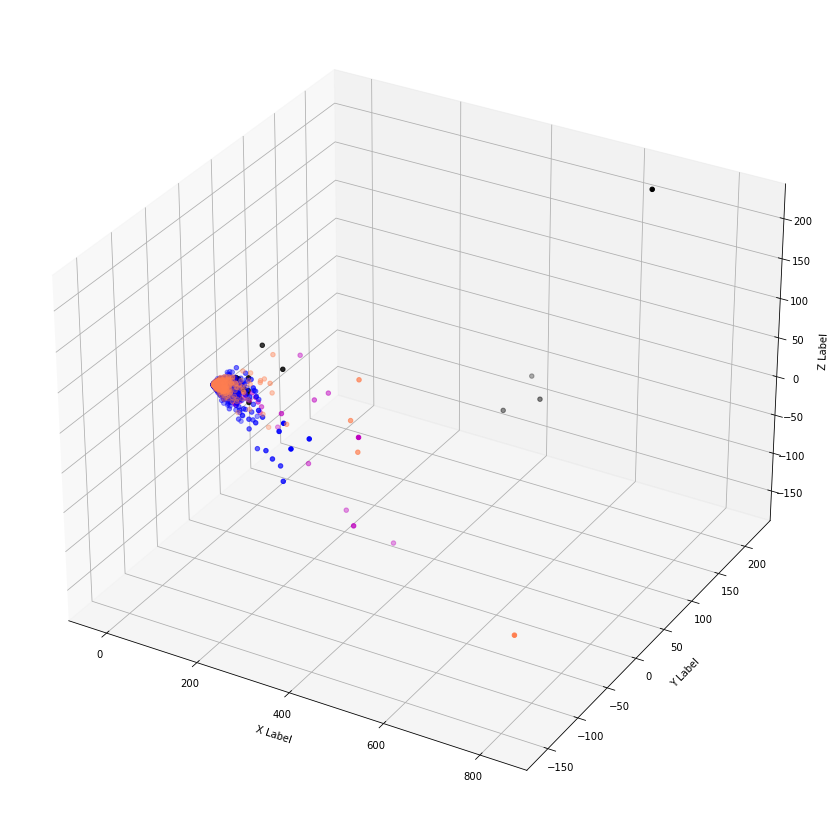

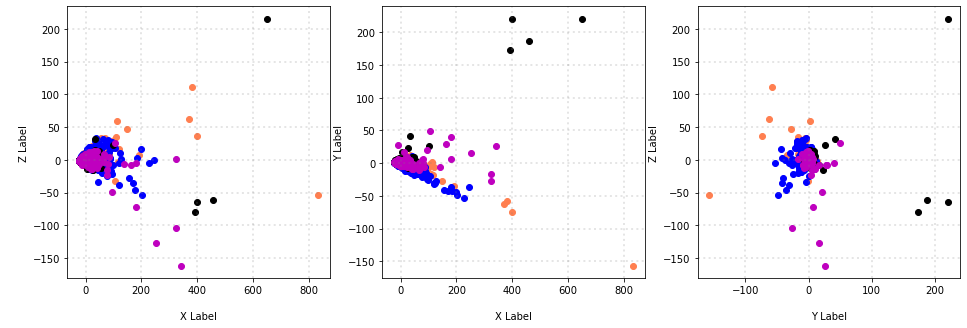

In [21]:
# Answer here
X_reduced3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (15,15))
#ax = plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1,projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[0]
    ys = X_reduced3D[X['category_name'] == category].T[1]
    zs = X_reduced3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# plot 2D(x,z)
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,3,1)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[0]
    ys = X_reduced3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nZ Label')

# plot 2D(x,y)

ax = fig.add_subplot(1,3,2)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[0]
    ys = X_reduced3D[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

# plot 2D(y,z)
ax = fig.add_subplot(1,3,3)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[1]
    ys = X_reduced3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nY Label')
ax.set_ylabel('\nZ Label')


plt.show()



In [22]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**

In [86]:
# Answer here

import plotly
from plotly.offline import iplot, init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(term_frequencies))]
trace = go.Bar(x=["term_"+ i for i in count_vect.get_feature_names() ], y=term_frequencies , marker={'color': colors})
data = [trace]
iplot(data)
fig = go.Figure(data=data)
fig.show()

### >>> **Exercise 14 (take home):** 

In [24]:
# Answer here
feature_name = count_vect.get_feature_names()
sorted_term_frequencies = sorted( term_frequencies,reverse = True )
sorted_feature_name = [x for y, x in sorted( zip( term_frequencies, feature_name ),reverse = True)]
Selected= [[x,y] for x,y in zip(sorted_term_frequencies,sorted_feature_name) if x>100 and x<1000 ] #can select a range to plot in order
print("selected ",len(Selected)," terms")
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(Selected))]
trace = go.Bar(x=["term_"+ i for i in [y for [x,y] in Selected ]], y=[x for [x,y] in Selected ] , marker={'color': colors})
data = [trace]
iplot(data)

selected  724  terms


### >>> **Exercise 15 (take home):** 

In [25]:
# Answer here
feature_name = count_vect.get_feature_names()
sorted_term_frequencies = sorted( term_frequencies,reverse = True )
sorted_feature_name = [x for y, x in sorted( zip( term_frequencies, feature_name ),reverse = True)]
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(sorted_term_frequencies))]
trace = go.Bar(x=["term_"+ i for i in sorted_feature_name ], y=sorted_term_frequencies  , marker={'color': colors})
data = [trace]
iplot(data)

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### >>> **Exercise 16 (take home):**

In [27]:
# Answer here
mlb_t = preprocessing.LabelBinarizer()
mlb_t.fit(X.category_name)
X['bin_category_by_category_name'] = mlb_t.transform(X['category_name']).tolist()
print("It does work")
X[0:9]

It does work


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_by_category_name  
0           comp.graphics                  [0, 1, 0, 0]  
1           comp.graphics                  [0, 1, 0, 0]  
2  soc.religion.christian                  [0, 0, 0, 1]  
3  soc.religion.christian                  [0, 0, 0, 1]  
4  soc.religion.christian                  [0, 0, 0, 1]  
5  soc.religion.christian                  [0, 0, 0, 1]  
6  soc.religion.christian                  [0, 0, 0, 1]  
7                 sci.med                  [0, 0, 1, 0]  
8                 sci.med                  [0, 0, 1, 0]

# >>> **HW1**

### **1. Data Preparation & Data Transformation**

In [28]:
import pandas as pd
import numpy as np

f = open('./DATASET/amazon_cells_labelled.txt')
data =f.readlines()

f = open('./DATASET/imdb_labelled.txt')
data.extend(f.readlines())

f = open('./DATASET/yelp_labelled.txt')
data.extend(f.readlines())

data_text = [data[i].split('\t')[0] for i in range(len(data))]
data_category = [int(data[i].split('\t')[1][0]) for i in range(len(data))]

X = pd.DataFrame(data_text, columns= ['sentence'])
X['score'] = data_category
X['score_name'] = np.where(X['score'] == 1, 'positive', 'negative')


#Exersice 3
X.loc[lambda f: f.score_name == 'positive'].iloc[::10, :][0:10]


sentence  score score_name
1                          Good case, Excellent value.      1   positive
21   I bought this to use with my Kindle Fire and a...      1   positive
44                        Excellent bluetooth headset.      1   positive
61   I really recommend this faceplates since it lo...      1   positive
78   I love this phone , It is very handy and has a...      1   positive
98   Best I've found so far .... I've tried 2 other...      1   positive
114                                  Absolutely great.      1   positive
130  It is so small and you don't even realize that...      1   positive
155  This phone is very fast with sending any kind ...      1   positive
173        The iGo chargers and tips are really great.      1   positive

### **2. Data Mining using Pandas**

In [29]:
import helpers.data_mining_helpers as dmh
X.isnull()

sentence  score  score_name
0        False  False       False
1        False  False       False
2        False  False       False
3        False  False       False
4        False  False       False
...        ...    ...         ...
2995     False  False       False
2996     False  False       False
2997     False  False       False
2998     False  False       False
2999     False  False       False

[3000 rows x 3 columns]

##### Check Missing Data

In [30]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

##### Check Duplicate Data

In [32]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [33]:
'''
for i in range(len(X.duplicated('sentence'))): 
    if X.duplicated('sentence')[i] == True:
        print(i,X['sentence'][i],X['score'][i])
'''
print(sum(X.duplicated()) , sum(X.duplicated('sentence')))

17 17


In [34]:
#get rid of all the duplicated records without preserving a copy
X.drop_duplicates(keep="first", inplace=True)
len(X)

2983

### **3. Data Processing**

##### Sampling

In [35]:
X_sample = X.sample(n=1000)
X_sample[0:10]

sentence  score score_name
799   I tried talking real loud but shouting on the ...      0   negative
1277  I'm not sure what he was trying to do with thi...      0   negative
222                  Simple, lightweight and great fit.      1   positive
1224  The flat reenactments don't hold your attentio...      0   negative
2619                                 I will not return.      0   negative
1142  It is an hour and half waste of time, followin...      0   negative
291                                       Don't buy it.      0   negative
638   I used bitpim (a free program you can find on ...      1   positive
2744                                  Will not be back!      0   negative
1135  I could not stand to even watch it for very lo...      0   negative

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

negative    1493
positive    1490
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

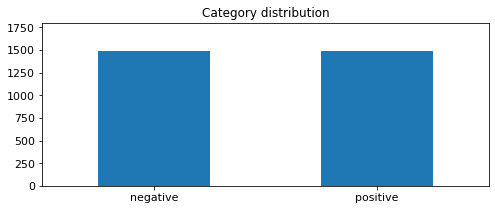

In [37]:
print(X.score_name.value_counts())
X.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

negative    508
positive    492
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

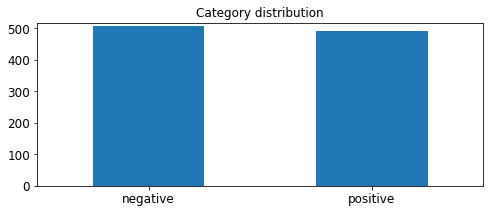

In [38]:
upper_bound = max(X_sample.score_name.value_counts()) + 10

print(X_sample.score_name.value_counts())

# plot barchart for X_sample
X_sample.score_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Text(0, 0.5, 'Count')

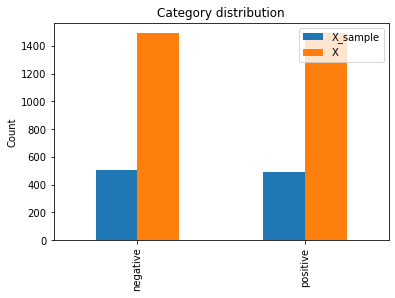

In [39]:
XYplot = pd.DataFrame({
    "X_sample":X_sample.score_name.value_counts(),
    "X":X.score_name.value_counts(),
    }
)

XYplot.plot(kind="bar")
plt.title("Category distribution")
plt.ylabel("Count")

##### Feature Creation

In [40]:
import nltk

In [41]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
X[0:4]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

##### Feature subset selection

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [44]:
analyze = count_vect.build_analyzer()
print(X['sentence'][0])
analyze(" ".join(list(X[:1].sentence)))

So there is no way for me to plug it in here in the US unless I go by a converter.


['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [45]:
#unigrams的做法會將標點符號也切割，並且有大小寫之分，對於正面負面語意分析未必是好的（Good & good 兩者都具有相同意義。）
#使用analyze生成tokens，不但排除標點符號，也統一小寫，tokenize速度也有提升。
X['tokens'] = [ analyze(" ".join(list(X[ i:i+1].sentence))) for i in range(len(X))]
X[:3]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   

                                              tokens  
0  [so, there, is, no, way, for, me, to, plug, it...  
1                     [good, case, excellent, value]  
2                         [great, for, the, jawbone]

##### Generate TF-IDF features

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
X_vec = vectorizer.fit_transform(X.sentence)
print(X_vec[1])
X['sentence'][1]
#Generate TF-IDF features from the tokens of each text.

  (0, 4861)	0.633627682893175
  (0, 1603)	0.47208678028809276
  (0, 713)	0.512627326445873
  (0, 1993)	0.3359512695758188


'Good case, Excellent value.'

In [47]:
X_counts.shape

(2983, 5155)

In [48]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [49]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [50]:
plot_y = ["sentence_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

all zeros in the heatmap!


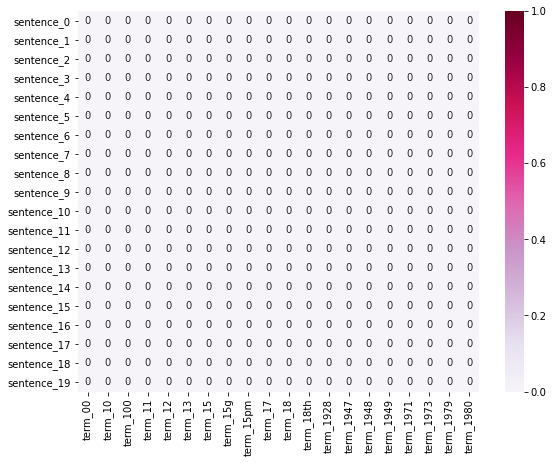

In [51]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
print("all zeros in the heatmap!")

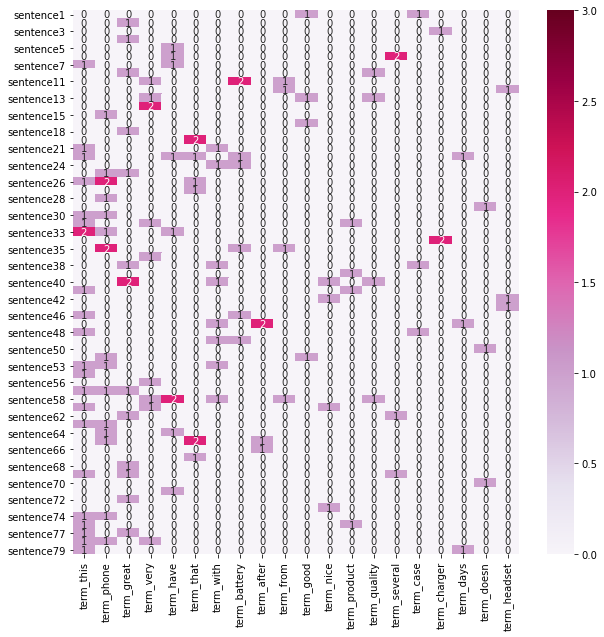

In [52]:
# Sample some docs with some terms 

sample_Y=80 #sample量
sample_X=20 #samle量中最常出現的前sample_X個terms

plot_Y = ["sentence_"+ str(i) for i in list(X.index)[0:sample_Y]]
iter_Z = X_counts[0:len(plot_Y),: ].toarray()

S=list(sum(iter_Z))
iter_X = []
plot_X = []
C=0
while (C !=sample_X):
    T = S.index(max(S))
    #print(T,count_vect.get_feature_names()[T])
    if T>=0:
        if len(count_vect.get_feature_names()[T])>3:                        # terms' length <4 are not included
            iter_X.append(T)
            plot_X.append("term_"+count_vect.get_feature_names()[T])
            C=C+1
        S[T]=-1
temp = X_counts[0:sample_Y,iter_X].toarray()
iter_Y = [i for i in range(sample_Y) if sum(temp.T)[i]>0]
plot_Y = ["sentence"+str(i) for i in iter_Y]
plot_Z = np.zeros((len(iter_Y), len(plot_X)))
#print(len(iter_Y))
for i in range(len(plot_X)):
    for j in range(len(iter_Y)):
        #print(i,j)
        plot_Z[j,i]=iter_Z[ iter_Y[j],iter_X[i]]

df_todraw = pd.DataFrame(plot_Z, columns = plot_X, index = plot_Y)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

#先取sample_Y個資料，並統計這些資料最相關的sample_X個terms，最後針對sample_X個terms將無關的doc忽略
#最後的生成heatmap

 ##### Dimensionality Reduction

In [53]:
from sklearn.decomposition import PCA

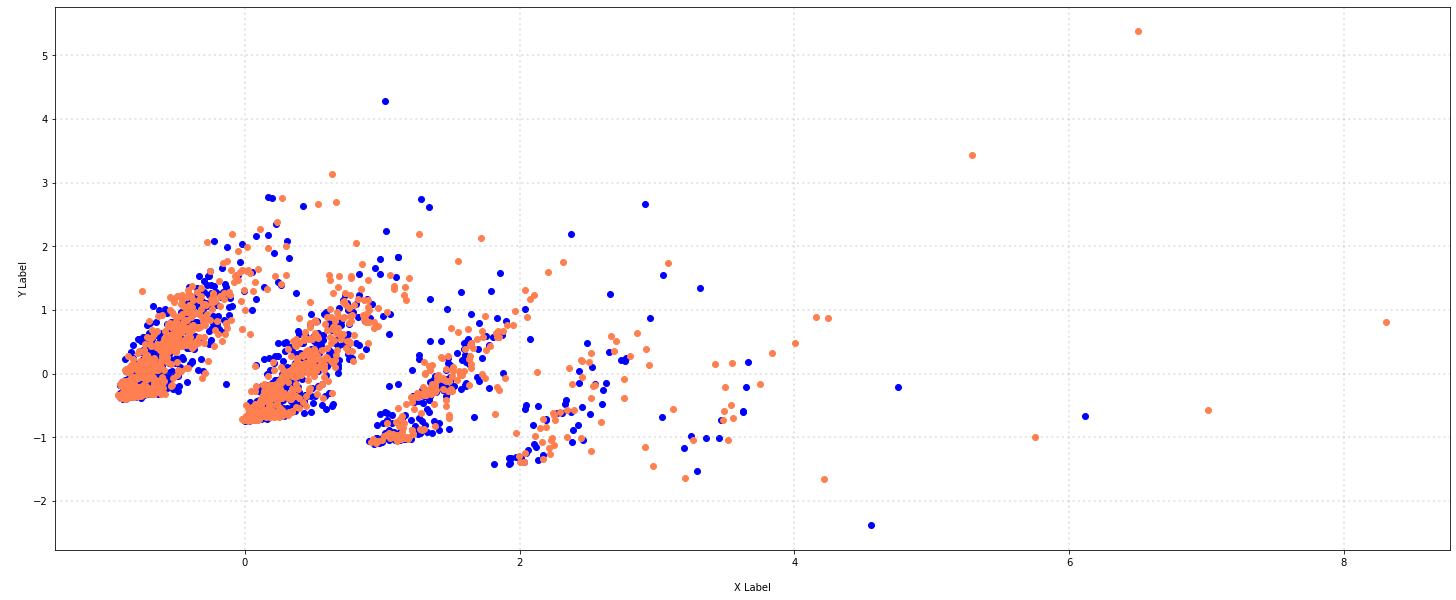

In [54]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
categories = ['negative','positive']
col = ['blue', 'coral']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score_name'] == category].T[0]
    ys = X_reduced[X['score_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

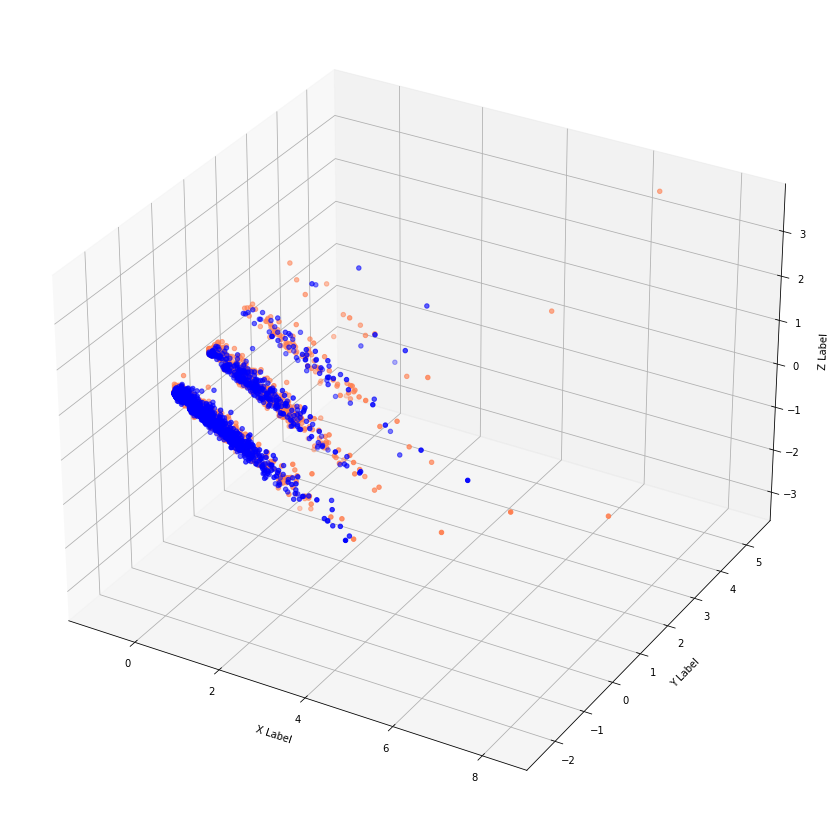

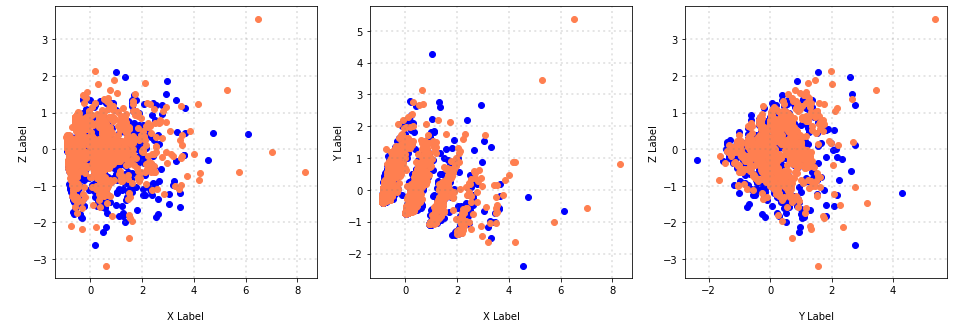

In [55]:
# Excersice 12
X_reduced3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot
fig = plt.figure(figsize = (15,15))
#ax = plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1,projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced3D[X['score_name'] == category].T[0]
    ys = X_reduced3D[X['score_name'] == category].T[1]
    zs = X_reduced3D[X['score_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# plot 2D(x,z)
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,3,1)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['score_name'] == category].T[0]
    ys = X_reduced3D[X['score_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nZ Label')

# plot 2D(x,y)

ax = fig.add_subplot(1,3,2)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['score_name'] == category].T[0]
    ys = X_reduced3D[X['score_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

# plot 2D(y,z)
ax = fig.add_subplot(1,3,3)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['score_name'] == category].T[1]
    ys = X_reduced3D[X['score_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nY Label')
ax.set_ylabel('\nZ Label')


plt.show()

##### Atrribute Transformation / Aggregation

In [56]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [57]:
#Exercise 13
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
import plotly
from plotly.offline import iplot, init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(term_frequencies))]
trace = go.Bar(x=["term_"+ i for i in count_vect.get_feature_names() ], y=term_frequencies , marker={'color': colors})
data = [trace]
iplot(data)

In [58]:
#exercise 14
feature_name = count_vect.get_feature_names()
sorted_term_frequencies = sorted( term_frequencies,reverse = True )
sorted_feature_name = [x for y, x in sorted( zip( term_frequencies, feature_name ),reverse = True)]
Selected= [[x,y] for x,y in zip(sorted_term_frequencies,sorted_feature_name) if x>100 and x<1000 ] #can select a range to plot in order
print("selected ",len(Selected)," terms")
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(Selected))]
trace = go.Bar(x=["term_"+ i for i in [y for [x,y] in Selected ]], y=[x for [x,y] in Selected ] , marker={'color': colors})
data = [trace]
iplot(data)

selected  45  terms


In [85]:
#exercise 15
feature_name = count_vect.get_feature_names()
sorted_term_frequencies = sorted( term_frequencies,reverse = True )
sorted_feature_name = [x for y, x in sorted( zip( term_frequencies, feature_name ),reverse = True)]
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(sorted_term_frequencies))]
trace = go.Bar(x=["term_"+ i for i in sorted_feature_name ], y=sorted_term_frequencies  , marker={'color': colors})
data = [trace]
iplot(data)

In [60]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

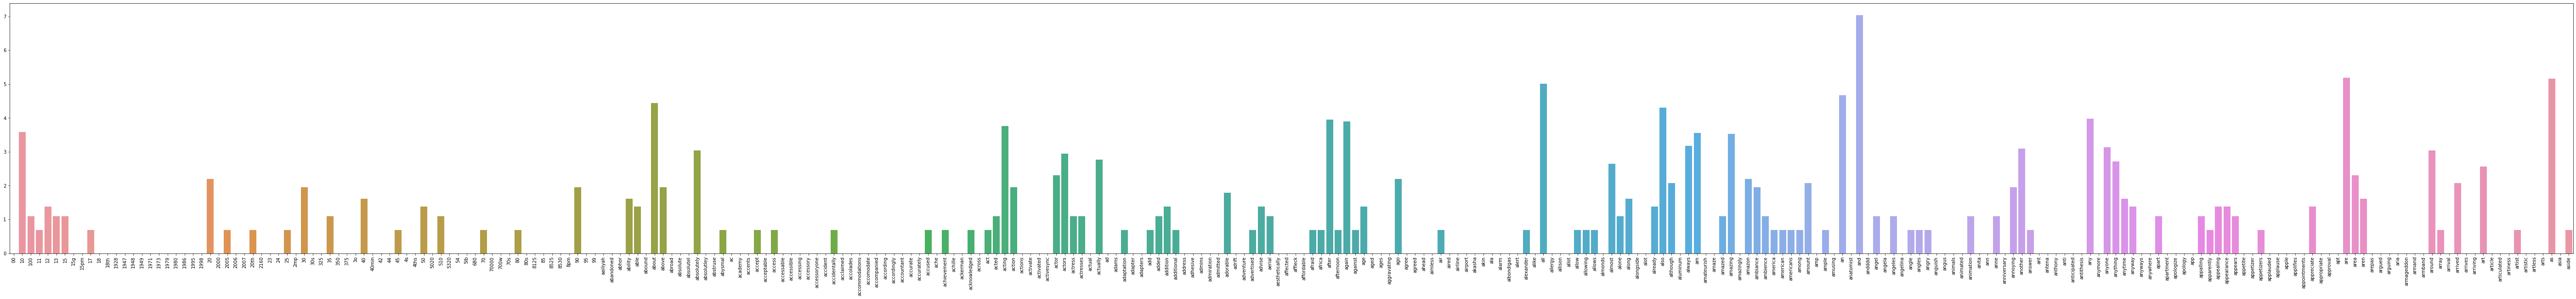

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

##### Discretization and Binarization

In [62]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [63]:
mlb = preprocessing.LabelBinarizer()

In [64]:
mlb.fit(X.score)

LabelBinarizer()

In [65]:
mlb.classes_

array([0, 1])

In [66]:
X['bin_category'] = mlb.transform(X['score']).tolist()
X[0:9]

sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   

                                              tokens bin_category  
0  [so, there, is, no, way, for, me, to, plug, it...          [0]  
1                     [good, case, excellent, value]          [1]  
2                         [great, for, the, jawbone]          [1]  
3  [tied, to, charger, for, conversations, lastin...          [0]  
4                              [the, mic, is, great]          [1]  
5  [have, to, jiggle, the, plug, to, get, it, to,...          [0]  
6  [if, you, have, several, dozen, or, several, h...          [0]  
7  [if, you, are, razr, owner, you, must, have, t...          [1]  
8             [needless, to, say, wasted, my, money]          [0]

### **4. Data Exploration**

In [67]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[51]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[2050]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [68]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['good protection and does not make phone too bulky.']
["We'd definitely go back here again."]


In [69]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.210819
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### **5. Naive Bayes classifier**

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [72]:
MNB_model = MultinomialNB()

In [73]:
def confusion_matrix(y_test,y_pred):
    tn, fp, fn, tp = 0,0,0,0
    for t,p in zip(y_test,y_pred):
        if (t==0 and p==0):
            tn +=1
        elif(t==0 and p==1):
            fp += 1
        elif(t==1 and p==0):
            fn += 1
        else:
            tp += 1
    return  tn, fp, fn, tp


### Classfication using TF-IDF Features

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, X.score, random_state=790, train_size=0.75)
MNB_model.fit(X_train, y_train)
print ( "# of positive :",len([i for i in range(len(X_train.toarray())) if list(y_train)[i] == 0]) )
print ( "# of negative :",len([i for i in range(len(X_train.toarray())) if list(y_train)[i] == 1]) )
y_pred = []
for i in X_test:
    y_pred.append(int(MNB_model.predict(i)))

# of positive : 1125
# of negative : 1112


#### Generate Confusion Matrix

precision : 0.8431635388739946
recall : 0.8253968253968254


(317, 51, 66, 312)

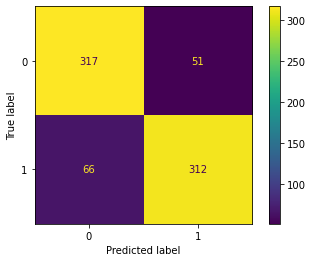

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred)
precision = (tn+tp)/(tn+fp+fn+tp)
recall = tp/(tp+fn)
print(f"precision : {precision}")
print(f"recall : {recall}")
plot_confusion_matrix(MNB_model, X_test, y_test) 
tn, fp, fn, tp 

###### 以下分析一下各類的文本內容，找出前十個重要的關鍵字（忽略長度小於3的字以刪除I.was.is.of.for等詞彙）。

In [76]:
#preprocessing for calculate TF-IDF for TP and TN Individually
TP = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] ==y_pred[i] and y_pred[i] ==1]
TN = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] ==y_pred[i] and y_pred[i] ==0]
FP = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] !=y_pred[i] and y_pred[i] ==1]
FN = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] !=y_pred[i] and y_pred[i] ==0]

TP_text = [ X['sentence'][i] for i in TP ] 
TN_text = [X['sentence'][i] for i in TN ]
FP_text = [ X['sentence'][i] for i in FP ] 
FN_text = [X['sentence'][i] for i in FN ]

TP_text_merge = ""
for i in TP_text:
    TP_text_merge = TP_text_merge+" "+i

TN_text_merge = ""
for i in TN_text:
    TN_text_merge = TN_text_merge+" "+i

FP_text_merge = ""
for i in FP_text:
    FP_text_merge = FP_text_merge+" "+i

FN_text_merge = ""
for i in FN_text:
    FN_text_merge = FN_text_merge+" "+i

In [77]:
#calculate TF-IDF
TP_vectorizer = TfidfVectorizer(min_df=1)
TN_vectorizer = TfidfVectorizer(min_df=1)
FP_vectorizer = TfidfVectorizer(min_df=1)
FN_vectorizer = TfidfVectorizer(min_df=1)

TP_vec = TP_vectorizer.fit_transform([TP_text_merge])
TN_vec = TN_vectorizer.fit_transform([TN_text_merge])
FP_vec = FP_vectorizer.fit_transform([FP_text_merge])
FN_vec = FN_vectorizer.fit_transform([FN_text_merge])

TP_dict = [x for y, x in sorted(zip(TP_vec.toarray()[0], TP_vectorizer.get_feature_names()),reverse = True)]
TN_dict = [x for y, x in sorted(zip(TN_vec.toarray()[0], TN_vectorizer.get_feature_names()),reverse = True)]
FP_dict = [x for y, x in sorted(zip(FP_vec.toarray()[0], FP_vectorizer.get_feature_names()),reverse = True)]
FN_dict = [x for y, x in sorted(zip(FN_vec.toarray()[0], FN_vectorizer.get_feature_names()),reverse = True)]

TP_key_dict = [ [x,TP_vec.toarray()[0][TP_vectorizer.get_feature_names().index(x)]] for x in TP_dict if len(x) >3 and x not in TN_dict ][:20]
TN_key_dict = [ [x,TN_vec.toarray()[0][TN_vectorizer.get_feature_names().index(x)]] for x in TN_dict if x not in TP_dict and len(x) >3][:20]
FP_key_dict = [ [x,FP_vec.toarray()[0][FP_vectorizer.get_feature_names().index(x)]] for x in FP_dict if len(x) >3 and x not in FN_dict ][:20]
FN_key_dict = [ [x,FN_vec.toarray()[0][FN_vectorizer.get_feature_names().index(x)]] for x in FN_dict if x not in FP_dict and len(x) >3][:20]

###### Plot the Figure

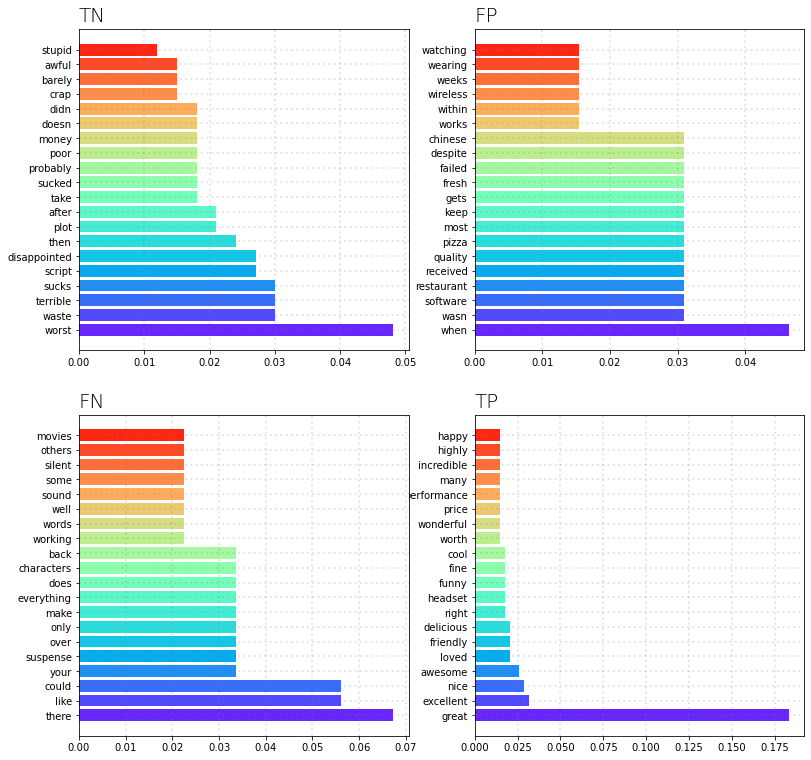

In [78]:
fig = plt.figure(figsize = (13,13))

ax = fig.add_subplot(2,2,4)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(TP_key_dict))]
ax.barh([ x for [x,y] in TP_key_dict ], [ y for [x,y] in TP_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'TP',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,1)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(TN_key_dict))]
ax.barh([ x for [x,y] in TN_key_dict ], [ y for [x,y] in TN_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'TN',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,2)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(FP_key_dict))]
ax.barh([ x for [x,y] in FP_key_dict ], [ y for [x,y] in FP_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'FP',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,3)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(FN_key_dict))]
ax.barh([ x for [x,y] in FN_key_dict ], [ y for [x,y] in FN_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'FN',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

plt.show()

以上可以看出：<br>
    ＴＮ： worst 這個字最為關鍵，並且其中許多字也含有負面的意涵。<br>
    ＴＰ： great這個字最為關鍵，並且許多字也含有正面的意涵。<br>
    ＦＰ： 可以看見這些文本內容關鍵的字本身多半沒有正面或負面的意涵，所以無法準確地判定。<br>
    ＦＮ： 幾乎沒有顯著正面或負面意涵的字，可能受到上下文的單詞影響，僅有的正面單詞（well）被稀釋以至於判斷結果錯誤。<br>

### Classfication using frequency counts

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, X.score, random_state=790, train_size=0.75)
MNB_model.fit(X_train, y_train)
print ( "# of positive :",len([i for i in range(len(X_train.toarray())) if list(y_train)[i] == 0]) )
print ( "# of negative :",len([i for i in range(len(X_train.toarray())) if list(y_train)[i] == 1]) )
y_pred = []
for i in X_test:
    y_pred.append(int(MNB_model.predict(i)))
#len( [[x,y] for x,y in zip(y_pred,y_test) if x!=y] )
#categories[int (MNB_model.predict(test_text_pos))]

# of positive : 1125
# of negative : 1112


#### Generate Confusion Matrix

In [80]:
#preprocessing for calculate TF-IDF for TP and TN Individually
TP = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] ==y_pred[i] and y_pred[i] ==1]
TN = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] ==y_pred[i] and y_pred[i] ==0]
FP = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] !=y_pred[i] and y_pred[i] ==1]
FN = [y_test.index[i] for i in range(len(y_test)) if y_test.values[i] !=y_pred[i] and y_pred[i] ==0]

TP_text = [ X['sentence'][i] for i in TP ] 
TN_text = [X['sentence'][i] for i in TN ]
FP_text = [ X['sentence'][i] for i in FP ] 
FN_text = [X['sentence'][i] for i in FN ]

TP_text_merge = ""
for i in TP_text:
    TP_text_merge = TP_text_merge+" "+i

TN_text_merge = ""
for i in TN_text:
    TN_text_merge = TN_text_merge+" "+i

FP_text_merge = ""
for i in FP_text:
    FP_text_merge = FP_text_merge+" "+i

FN_text_merge = ""
for i in FN_text:
    FN_text_merge = FN_text_merge+" "+i#以下分析一下各類的文本內容，找出前十個重要的關鍵字（忽略長度小於3的字以刪除I.was.is.of.for等詞彙）。

##### 以下分析一下各類的文本內容，找出前十個重要的關鍵字（忽略長度小於3的字以刪除I.was.is.of.for等詞彙）。

precision : 0.8351206434316354
recall : 0.8227513227513228


(312, 56, 67, 311)

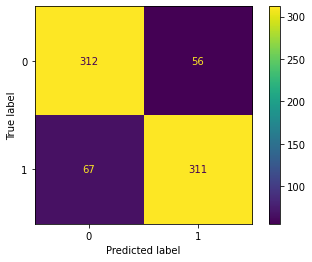

In [81]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred)
precision = (tn+tp)/(tn+fp+fn+tp)
recall = tp/(tp+fn)
print(f"precision : {precision}")
print(f"recall : {recall}")
plot_confusion_matrix(MNB_model, X_test, y_test) 
tn, fp, fn, tp 

In [82]:
#calculate counts
TP_vect = CountVectorizer()
TN_vect = CountVectorizer()
FP_vect = CountVectorizer()
FN_vect = CountVectorizer()

TP_counts = TP_vect.fit_transform([TP_text_merge])
TN_counts = TN_vect.fit_transform([TN_text_merge])
FP_counts = FP_vect.fit_transform([FP_text_merge])
FN_counts = FN_vect.fit_transform([FN_text_merge])

TP_dict = [x for y, x in sorted(zip(TP_counts.toarray()[0], TP_vect.get_feature_names()),reverse = True)]
TN_dict = [x for y, x in sorted(zip(TN_counts.toarray()[0], TN_vect.get_feature_names()),reverse = True)]
FP_dict = [x for y, x in sorted(zip(FP_counts.toarray()[0], FP_vect.get_feature_names()),reverse = True)]
FN_dict = [x for y, x in sorted(zip(FN_counts.toarray()[0], FN_vect.get_feature_names()),reverse = True)]

TP_key_dict = [ [x,TP_counts.toarray()[0][TP_vect.get_feature_names().index(x)]] for x in TP_dict if len(x) >3 and x not in TN_dict ][:20]
TN_key_dict = [ [x,TN_counts.toarray()[0][TN_vect.get_feature_names().index(x)]] for x in TN_dict if x not in TP_dict and len(x) >3][:20]
FP_key_dict = [ [x,FP_counts.toarray()[0][FP_vect.get_feature_names().index(x)]] for x in FP_dict if len(x) >3 and x not in FN_dict ][:20]
FN_key_dict = [ [x,FN_counts.toarray()[0][FN_vect.get_feature_names().index(x)]] for x in FN_dict if x not in FP_dict and len(x) >3][:20]

##### Plot the Figure

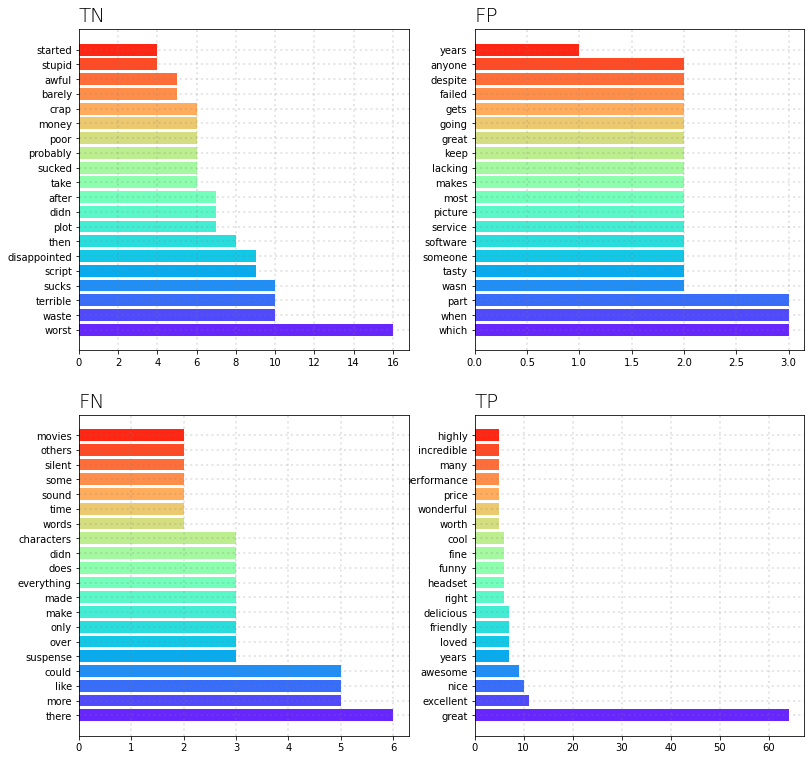

In [83]:
#plot the figure
fig = plt.figure(figsize = (13,13))

ax = fig.add_subplot(2,2,4)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(TP_key_dict))]
ax.barh([ x for [x,y] in TP_key_dict ], [ y for [x,y] in TP_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'TP',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,1)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(TN_key_dict))]
ax.barh([ x for [x,y] in TN_key_dict ], [ y for [x,y] in TN_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'TN',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,2)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(FP_key_dict))]
ax.barh([ x for [x,y] in FP_key_dict ], [ y for [x,y] in FP_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07 , 'FP',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

ax = fig.add_subplot(2,2,3)
colors = [rgb2hex(i) for i in sns.color_palette('rainbow', len(FN_key_dict))]
ax.barh([ x for [x,y] in FN_key_dict ], [ y for [x,y] in FN_key_dict ], color = colors)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.text(0, 1.07, 'FN',transform=ax.transAxes, size=20, weight=200, ha='left', va='top') #標題

plt.show()

以上可以看出：<br>
    ＴＮ： worst 這個字最為關鍵，並且其中許多字也含有負面的意涵。<br>
    ＴＰ： great這個字最為關鍵，並且許多字也含有正面的意涵。<br>
    ＦＮ： 多半沒有顯著正面或負面意涵的字。<br>
    ＦＰ： 可以看見這些文本內容關鍵的字本身多半沒有正面或負面的意涵。特別注意到裡頭關鍵的字彙包含了great這個最顯著正面的字，<br>可能導致由於不考慮上下文的句意，導致最後判定結果錯誤。<br>


#### ->兩個classifier訓練後，使用TF-IDF的classifier其precision和recall皆略高於使用Frequency Counts的classifier，但差異其實並不顯著。
1. Sentence的長度有些很短並且內容不一定包含顯著正面或反面的單詞，使用TF-IDF後可能效果跟frequency counts差不多。
2. 由於資料中tokens未經過前處理，所以很大一部分都是介詞、助詞、主詞等，因此一些用來判斷正面或負面的關鍵字就可能被稀釋，導致最後準確率沒有很高。
3. 缺乏上下文句意的分析，例如：「does not make phone too bulky 」 ，由於單詞為負面，但實為否定句，這類型的句子就很難準確被判定。